### Is working abroad preferred

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import math
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud # word cloud

from scipy.stats import norm

In [18]:
conversion_dic = {
    "gender": "category",
    "department": "category",
    "academic_year": "category",
    "current_residence": "category",
    "study_preference": "category",
    "gpa": "category",
    "sleep_hours": "category",
    "job_search_duration": "category",
    "higher_education": "category",
    "work_style": "category",
    "country_preference": "category",
    "sector_preference": "category",
    "field_preference": "category",
}

df = pd.read_csv("Cleaned Data.csv").astype(conversion_dic)

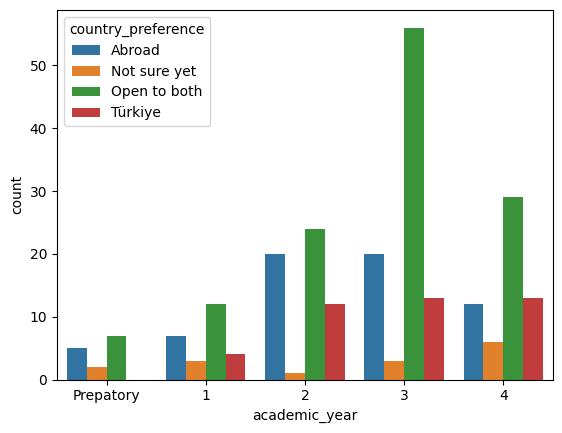

In [19]:
# Raw count
sns.countplot(x="academic_year",
              hue="country_preference",
              order=["Prepatory", "1", "2", "3", "4"],
              data=df)
plt.show()

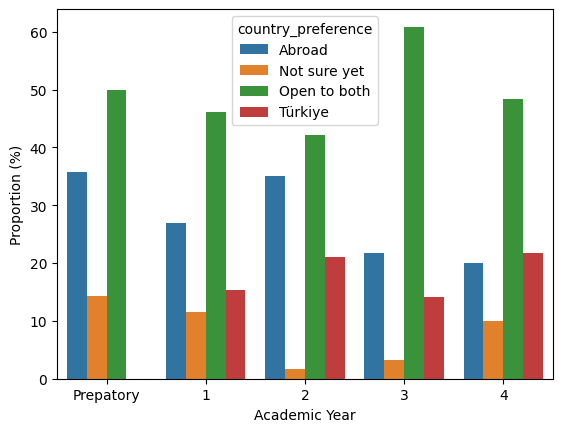

In [20]:
# Proportions
g = df.groupby("academic_year")["country_preference"].value_counts(normalize=True).to_frame(name="prop").reset_index()
g["prop"] = g["prop"] * 100

sns.barplot(x="academic_year",
           y="prop",
           hue = "country_preference",
           order = ["Prepatory", "1", "2", "3", "4"],
            data = g)

plt.xlabel("Academic Year")
plt.ylabel("Proportion (%)")
plt.show()

In [21]:
g["academic_year"] != "Prepatory"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16    False
17    False
18    False
19    False
Name: academic_year, dtype: bool

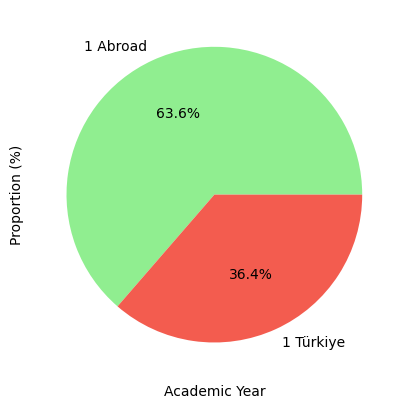

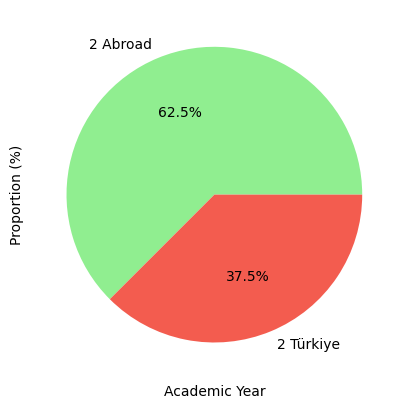

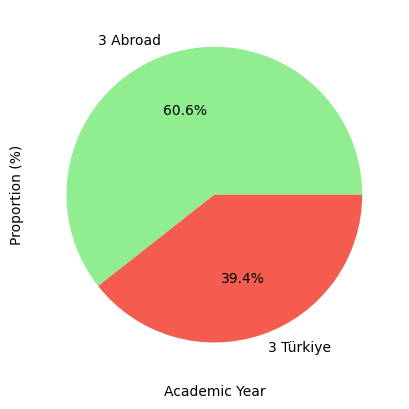

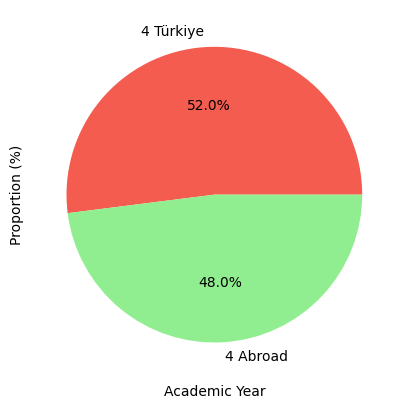

In [22]:
# Sadece Turkiye ve abroad proportions
s = df.loc[df["country_preference"].isin(["Türkiye", "Abroad"]), ]
g = s.groupby("academic_year")["country_preference"].value_counts().to_frame(name="count").reset_index()
g = g.loc[(g["count"] != 0) & (g["academic_year"] != "Prepatory"), ]
counts = g["count"]
label = zip(g.academic_year, g.country_preference)
l = [y + " " + cp for y, cp in zip(g.academic_year, g.country_preference)]

for i in range(0, 6, 2): 
    plt.pie(x=counts[i:i+2],
           labels=l[i:i+2],
            colors=["lightgreen", "#f35c4f"],
           autopct='%1.1f%%')
    
    plt.xlabel("Academic Year")
    plt.ylabel("Proportion (%)")
    plt.show()

plt.pie(x=counts[6:],
           labels=l[6:],
            colors=["#f35c4f", "lightgreen"],
           autopct='%1.1f%%')
    
plt.xlabel("Academic Year")
plt.ylabel("Proportion (%)")
plt.show()
    

### 4. senede Turkiye orani daha fazla oluyor. Acaba 1. ve 4. sinif arasindaki bu fark significant mi?

Test edelim:

In [23]:
df[["academic_year", "country_preference"]].value_counts()



academic_year  country_preference
3              Open to both          56
4              Open to both          29
2              Open to both          24
               Abroad                20
3              Abroad                20
               Türkiye               13
4              Türkiye               13
1              Open to both          12
2              Türkiye               12
4              Abroad                12
1              Abroad                 7
Prepatory      Open to both           7
4              Not sure yet           6
Prepatory      Abroad                 5
1              Türkiye                4
               Not sure yet           3
3              Not sure yet           3
Prepatory      Not sure yet           2
2              Not sure yet           1
dtype: int64

In [24]:
test_df = df.groupby("academic_year")["country_preference"].value_counts(normalize=True).to_frame(name="prop").reset_index()
test_df = test_df.loc[test_df["academic_year"].isin(["1", "4"]) & (test_df["country_preference"] == "Türkiye"), ]

year_1_prop = test_df.iloc[0, 2] # 15.38% or 4
year_1_n = df["academic_year"].value_counts()[3] # 26

year_4_prop = test_df.iloc[1, 2] # 21.67% or 13
year_4_n = df["academic_year"].value_counts()[1] # 60

### Check if 4th year students prefer to remain in Turkiye more than 1st year students.

$$ H_0: p_4 = p_1 \Rightarrow 0.2167 = 15.38 $$
$$ H_A: p_4 > p_1 \Rightarrow 0.2167 > 15.38 $$
$$ \alpha = 0.10 $$

In [25]:
# Assumptions are not met for 1st year student n1*p1 = 4 < 5
# We will proceed knowing normality is at risk

p_pooled = (4 + 13) / (26 + 60)
z_stat = (year_4_prop - year_1_prop) / np.sqrt(p_pooled * (1 - p_pooled) * (1/year_4_n + 1/year_1_n))

p_value = 1 - norm.cdf(z_stat)
print("p_value: " + str(p_value))


p_value: 0.2508436970343273


### Can't reject Null Hypothesis

### Estimate the total proportion of Engineering students that have decided to remain in Turkiye

##### There are 8258 engineering students at METU
##### Lets estimate the proportion of all the students that prefer to work in Turkiye.
##### We have a stratified sample based on the departments.
##### Construct the interval based on stratified sample formula


In [26]:
# There are 8258 engineering students at METU
# Lets estimate the proportion of all the students that prefer to work in Turkiye.

department_populations = {
    "CHEM": 785,
    "CE": 1233,
    "CENG": 938,
    "EE": 1325,
    "FE": 517,
    "IE": 734,
    "ME": 1293,
    "MALZ": 573,
    "MADEN": 427,
    "PETROL": 433,
}

department_samples = {
    "CHEM": 22,
    "CE": 29,
    "CENG": 22,
    "EE": 47,
    "FE": 21,
    "IE": 35,  
    "ME": 18,
    "MALZ": 18,
    "MADEN": 17,
    "PETROL": 20    
}

dep_props = pd.crosstab(index = df["department"], columns = df["country_preference"], normalize="index")["Türkiye"]
dep_props

department
Chemical Engineering                       0.136364
Civil Engineering                          0.068966
Computer Engineering                       0.045455
Electrical and Electronics Engineering     0.170213
Food Engineering                           0.142857
Industrial Engineering                     0.428571
Mechanical Engineering                     0.166667
Metallurgical and Materials Engineering    0.166667
Mining Engineering                         0.058824
Petroleum and Natural Gas Engineering      0.150000
Name: Türkiye, dtype: float64

In [27]:
def stratified_prop(pop_dic, sample_props):
    if len(pop_dic) != len(sample_props):
        print("dictionary lengths are not equal")
        return None

    sum = 0
    for i in range(len(pop_dic)):
        sum += (list(pop_dic.values())[i] / 8258) * sample_props[i]

    return sum

def stratified_prop_var(pop_dic, sample_dic, sample_props):
    if len(pop_dic) != len(sample_props):
        print("dictionary lengths are not equal")
        return None

    sum = 0
    
    for i in range(len(pop_dic)):
        p_i = sample_props[i]
        n_i = list(sample_dic.values())[i]
        N_i = list(pop_dic.values())[i]
    
        sum += ((N_i / 8258) ** 2) * p_i * (1 - p_i) / (n_i - 1) * (1 - n_i / N_i)

    return sum

In [28]:
p_hat = stratified_prop(department_populations, dep_props)
var = stratified_prop_var(department_populations, department_samples, dep_props)

In [29]:
print(p_hat, var)
print(np.sqrt(var))

0.15133742241722584 0.0005407483550058613
0.02325399653835575


#### We have found the point estimate and standard error of the proportion of engineering students that prefer to stay in turkiye after graduation
$ \hat{p} = 0.151$; $ S_E = 0.0233$

#### Construct a 90% confidence interval for METU engineering graduates.
$$ \hat{p} \pm Z_{\frac{\alpha}{2}} \times S_E = 0.151 \pm 1.65 \times 0.0233 $$
$$ (0.113, 0.189) $$

## With 90% confidence, we can say that the true population proportion of students that want to work in Turkiye after graduation is between 11.3% and 18.9%